# Project Description:

This assignment focuses on building and evaluating different classifiers for breast cancer classification using the breast cancer dataset. The classifiers implemented include Bagging, Boosting, and a Dummy Classifier.

#### data science pipeline

1. **Understanding the Dataset**: understanding of the dataset by reviewing the dataset documentation and exploring the features.

2. **Load the Data**: Reading the dataset file (`breast-cancer.csv`) and load it.

3. **Exploratory Analysis**: Performing exploratory data analysis to reach insights into the dataset. This include visualizations and statistical summaries.

4. **Data Preprocessing**: Applying necessary preprocessing steps such as handling missing values, handling skewness, and normalizing the data.

5. **Modeling**: Creating and training different classifiers. Implement Bagging classifiers with various estimators and a Dummy Classifier.

6. **Evaluation**: Evaluating the performance of the classifiers using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Compare the performance of different models and analyze why some methods perform better than others. Experiment with different configurations for Bagging and Boosting models.

7. **Visualization**: Visualization the results and evaluation metrics using appropriate plots. Plot the Precision-Recall Curve for decision tree and random forest classifiers. Additionally, generate feature importance plots for the random forest classifier.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import yaml
import seaborn as sns

# Set random seed for reproducibility
random_seed = 42

#### loading data & exploratory analysis

In this part, the breast cancer dataset is read and the first few rows are displayed to have overview of data and types of them.

After that,  dataset's information including column names, data types, and non-null counts are printed to achieve more detail of breast cancer data status and also the distribution of the target variable 'diagnosis' which indicates the counts of malignant (M) and benign (B) is checked.

In [67]:
# Import the data
configPath = 'config.yaml'

# Read the yaml data from the file
with open(configPath, 'r') as file:
    configData = yaml.safe_load(file)

df = pd.read_csv(configData["breast_cancer_path"])

# Display the first few rows of the dataset
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [68]:
# Getting an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As above results show, it seems there is no null values in the data, but in the following code we will double check it with static methods.

In [69]:
# Check the distribution of target variable
print(df['diagnosis'].value_counts())

# Check for missing values
print(df.isnull().sum())

B    357
M    212
Name: diagnosis, dtype: int64
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


The diagnosis columns involves 357 B class and 212 M class. and as previouse part showed there is no non-value feature.

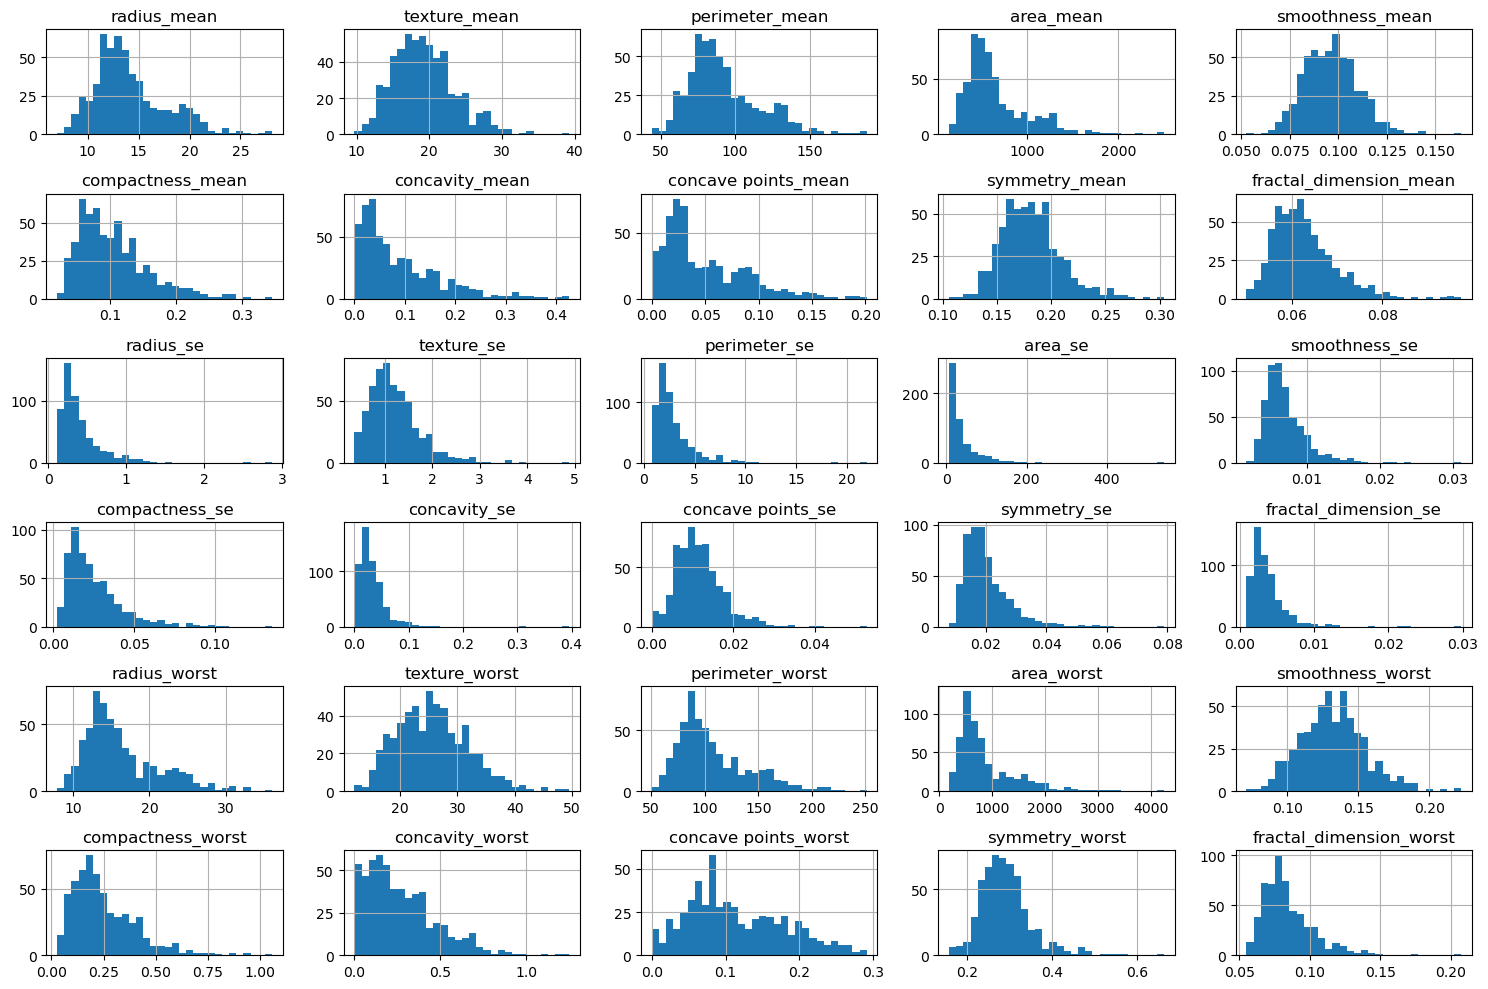

In [70]:
# Visualization the distribution of features
import matplotlib.pyplot as plt

df.drop(['id'], axis=1).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

The distrbution of features expect 'id' field are checked and regarding the right tail it seems that the data are not normalized.

Id field is not important field in this assignment and don't give significant data for breast cancer status in this assignment.

#### preprocessing data

As the 'diagnosis' column is an categorical, it is encoded for the classifiers to work with numeric labels.

Also, data for furture calculations are splitted to dependent(/target) variable ('diagnosis column) and independent (features) variable.



Finally, the missing value are handled with the mean value.

In [71]:
from sklearn.preprocessing import LabelEncoder

# Encode the diagnosis column (Malignant = 1, Benign = 0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Split the data into features (X) and target(dependent) variable (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# handling missing values (replace them with mean)
X = X.fillna(X.mean())

In this step, the code identifies features with skewness above a threshold of 0.7. Skewness indicates the asymmetry of the distribution of a feature. The code then applies a power transformation to these skewed features to make their distributions more symmetric and closer to a normal distribution. 

After that, the features using standard scaling, which ensures that each feature has a mean of 0 and a standard deviation of 1. This helps improve the performance of many machine learning algorithms that are sensitive to the scale of features. 

The following part is done because of the result of exploratory analysis that showed there is a different variance between data.

Finally, the test and train data are created based on prepared data for the rest analysis of breast cancer dataset.

In [72]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Calculating skewness of the features
skewness = X.skew()

# Selecting features with skewness above a threshold (0.7)
skewed_features = skewness[abs(skewness) > 0.7].index

# Applying power transformation 
power_transformer = PowerTransformer()
X_skewed = X[skewed_features].copy()
X_skewed_transformed = power_transformer.fit_transform(X_skewed)

# Replacing the original skewed features with the transformed features
X[skewed_features] = X_skewed_transformed

# Normalizing the features using standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_seed)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


#### Creating the bagging, boosting, and dummy classifiers

Here, different instances of Bagging and AdaBoost classifiers are created with varying numbers of estimators. The BaggingClassifier combines multiple base estimators to improve model performance, while AdaBoostClassifier adapts its focus on samples that were misclassified by the previous estimator. A DummyClassifier is used as a baseline that always predicts the most frequent class.

Increasing the number of estimators can improve performance, but it increases computation time, as well; Because of this in the following just 15, 10 and 5 values is used for estimators.

In [74]:
# Bagging Classifier with different estimator
bagging_clf_15 = BaggingClassifier(n_estimators=15, random_state=random_seed)
bagging_clf_10 = BaggingClassifier(n_estimators=10, random_state=random_seed)
bagging_clf_5 = BaggingClassifier(n_estimators=5, random_state=random_seed)

# AdaBoost Classifier with different estimator
adaboost_clf_15 = AdaBoostClassifier(n_estimators=15, random_state=random_seed)
adaboost_clf_10 = AdaBoostClassifier(n_estimators=10, random_state=random_seed)
adaboost_clf_5 = AdaBoostClassifier(n_estimators=5, random_state=random_seed)

# Dummy Classifier as a baseline
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=random_seed)

In the following section, the classifiers are trained with the training data and then used to predict the labels of the test data to used in the evaluatation models' part.

In [75]:
# Train and evaluate Bagging Classifier
bagging_clf_15.fit(X_train, y_train)
bagging_pred_15 = bagging_clf_15.predict(X_test)

bagging_clf_10.fit(X_train, y_train)
bagging_pred_10 = bagging_clf_10.predict(X_test)

bagging_clf_5.fit(X_train, y_train)
bagging_pred_5 = bagging_clf_5.predict(X_test)

# Train and evaluate AdaBoost Classifier
adaboost_clf_15.fit(X_train, y_train)
adaboost_pred_15 = adaboost_clf_15.predict(X_test)

adaboost_clf_10.fit(X_train, y_train)
adaboost_pred_10 = adaboost_clf_10.predict(X_test)

adaboost_clf_5.fit(X_train, y_train)
adaboost_pred_5 = adaboost_clf_5.predict(X_test)

# Train and evaluate Dummy Classifier
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)


#### Method Evaluation

The predictions calculated in the above section are used to evaluate the models' performance using various evaluation metrics like accuracy, precision, recall, and F1-score.

In [76]:
# Define evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score
}

#this function evaluate the specific model based on defined metrics and prediction set
def evaluate_model(model, predictions):
    eval_results = {}
    for metric_name, metric_func in metrics.items():
        if model.classes_[0] == 'B':
            label_mapping = {'B': 0, 'M': 1}
            y_test_mapped = y_test.map(label_mapping)
            predictions_mapped = [label_mapping[pred] for pred in predictions]
        else:
            y_test_mapped = y_test
            predictions_mapped = predictions
        eval_results[metric_name] = metric_func(y_test_mapped, predictions_mapped)
    return eval_results

In [77]:
# Evaluating Bagging Classifier
bagging_results_15 = evaluate_model(bagging_clf_15, bagging_pred_15)
bagging_results_10 = evaluate_model(bagging_clf_10, bagging_pred_10)
bagging_results_5 = evaluate_model(bagging_clf_5, bagging_pred_5)

# Evaluating AdaBoost Classifier
adaboost_results_15 = evaluate_model(adaboost_clf_15, adaboost_pred_15)
adaboost_results_10 = evaluate_model(adaboost_clf_10, adaboost_pred_10)
adaboost_results_5 = evaluate_model(adaboost_clf_5, adaboost_pred_5)

# Evaluating Dummy Classifier
dummy_results = evaluate_model(dummy_clf, dummy_pred)

# Displaying the results
print('Bagging Classifier Results:')
print("15 estimator", bagging_results_15)
print("10 estimator", bagging_results_10)
print("5 estimator", bagging_results_5)
print('\nAdaBoost Classifier Results:')
print("15  estimator", adaboost_results_15)
print("10 estimator", adaboost_results_10)
print("5  estimator", adaboost_results_5)
print('\nDummy Classifier Results:')
print(dummy_results)


Bagging Classifier Results:
15 estimator {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1-score': 0.9411764705882352}
10 estimator {'Accuracy': 0.9649122807017544, 'Precision': 0.975609756097561, 'Recall': 0.9302325581395349, 'F1-score': 0.9523809523809524}
5 estimator {'Accuracy': 0.9473684210526315, 'Precision': 0.9302325581395349, 'Recall': 0.9302325581395349, 'F1-score': 0.9302325581395349}

AdaBoost Classifier Results:
15  estimator {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1-score': 0.9411764705882352}
10 estimator {'Accuracy': 0.9649122807017544, 'Precision': 1.0, 'Recall': 0.9069767441860465, 'F1-score': 0.951219512195122}
5  estimator {'Accuracy': 0.9824561403508771, 'Precision': 1.0, 'Recall': 0.9534883720930233, 'F1-score': 0.9761904761904763}

Dummy Classifier Results:
{'Accuracy': 0.6228070175438597, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0}


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As Bagging Classifier and the AdaBoost Classifier evaluation results based on all metrics has a high score (over 90%), it shows that both are performing well, and also the AdaBoost Classifier having slightly better results, especially when using a smaller number of estimators (5). 

The Dummy Classifier, on the other hand, is performing poorly and isn't providing meaningful predictions for given breast cancer data. It reaches an accuracy of about 62.28%, but it has very low precision, recall, and F1-score, all being 0.

#### Visualization results

In the following, the results of each model with estimators are plotted with confusion matrix and ROC curve.

The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions of breast cancer data, while the ROC curve illustrates the trade-off between true positive rate and false positive rate.

As in the above section, Dummy Classifier didn't reach to the proper results in the following is not considered.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class metho

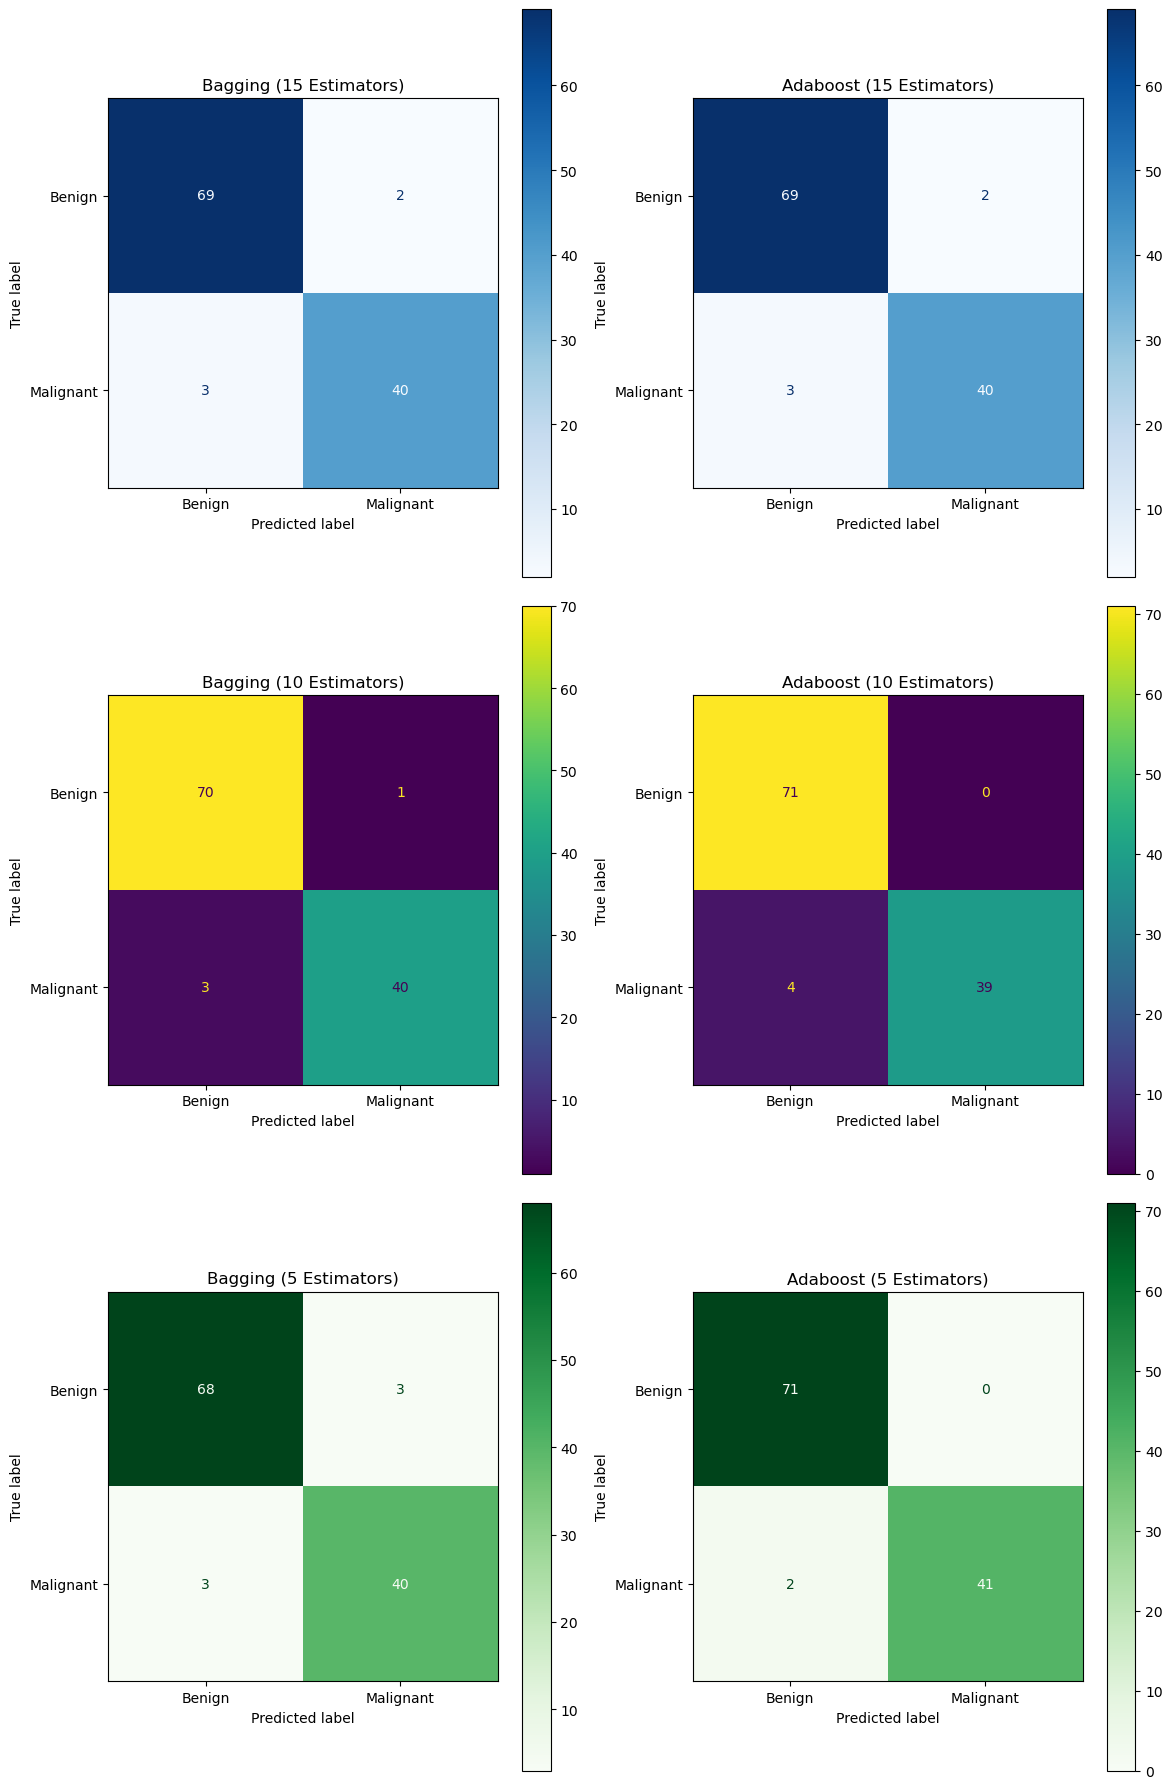

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# ploting the result of Confusion Matrix

class_names = ['Benign', 'Malignant']

fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# 15 estimators
plot_confusion_matrix(bagging_clf_15, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, ax=axes[0, 0])
axes[0, 0].set_title("Bagging (15 Estimators)")
plot_confusion_matrix(adaboost_clf_15, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, ax=axes[0, 1])
axes[0, 1].set_title("Adaboost (15 Estimators)")

# 10 estimators
plot_confusion_matrix(bagging_clf_10, X_test, y_test, display_labels=class_names, ax=axes[1, 0])
axes[1, 0].set_title("Bagging (10 Estimators)")
plot_confusion_matrix(adaboost_clf_10, X_test, y_test, display_labels=class_names, ax=axes[1, 1])
axes[1, 1].set_title("Adaboost (10 Estimators)")

# 5 estimators
plot_confusion_matrix(bagging_clf_5, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens, ax=axes[2, 0])
axes[2, 0].set_title("Bagging (5 Estimators)")
plot_confusion_matrix(adaboost_clf_5, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens, ax=axes[2, 1])
axes[2, 1].set_title("Adaboost (5 Estimators)")

# Adjust layout
plt.tight_layout()
plt.show()

As shown in the above figures both models with all estimators works well (all have error type 1 and 2 under 5) but like the previouse section the Adaboost works better than baggin especially with 5 estimators which has 2 FN and 0 FP.

FN: means model predicted 'Benign' but the actual result was 'Malignant'

FP: means model predicted 'Malignant' but the actual result was 'Benign'

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be re

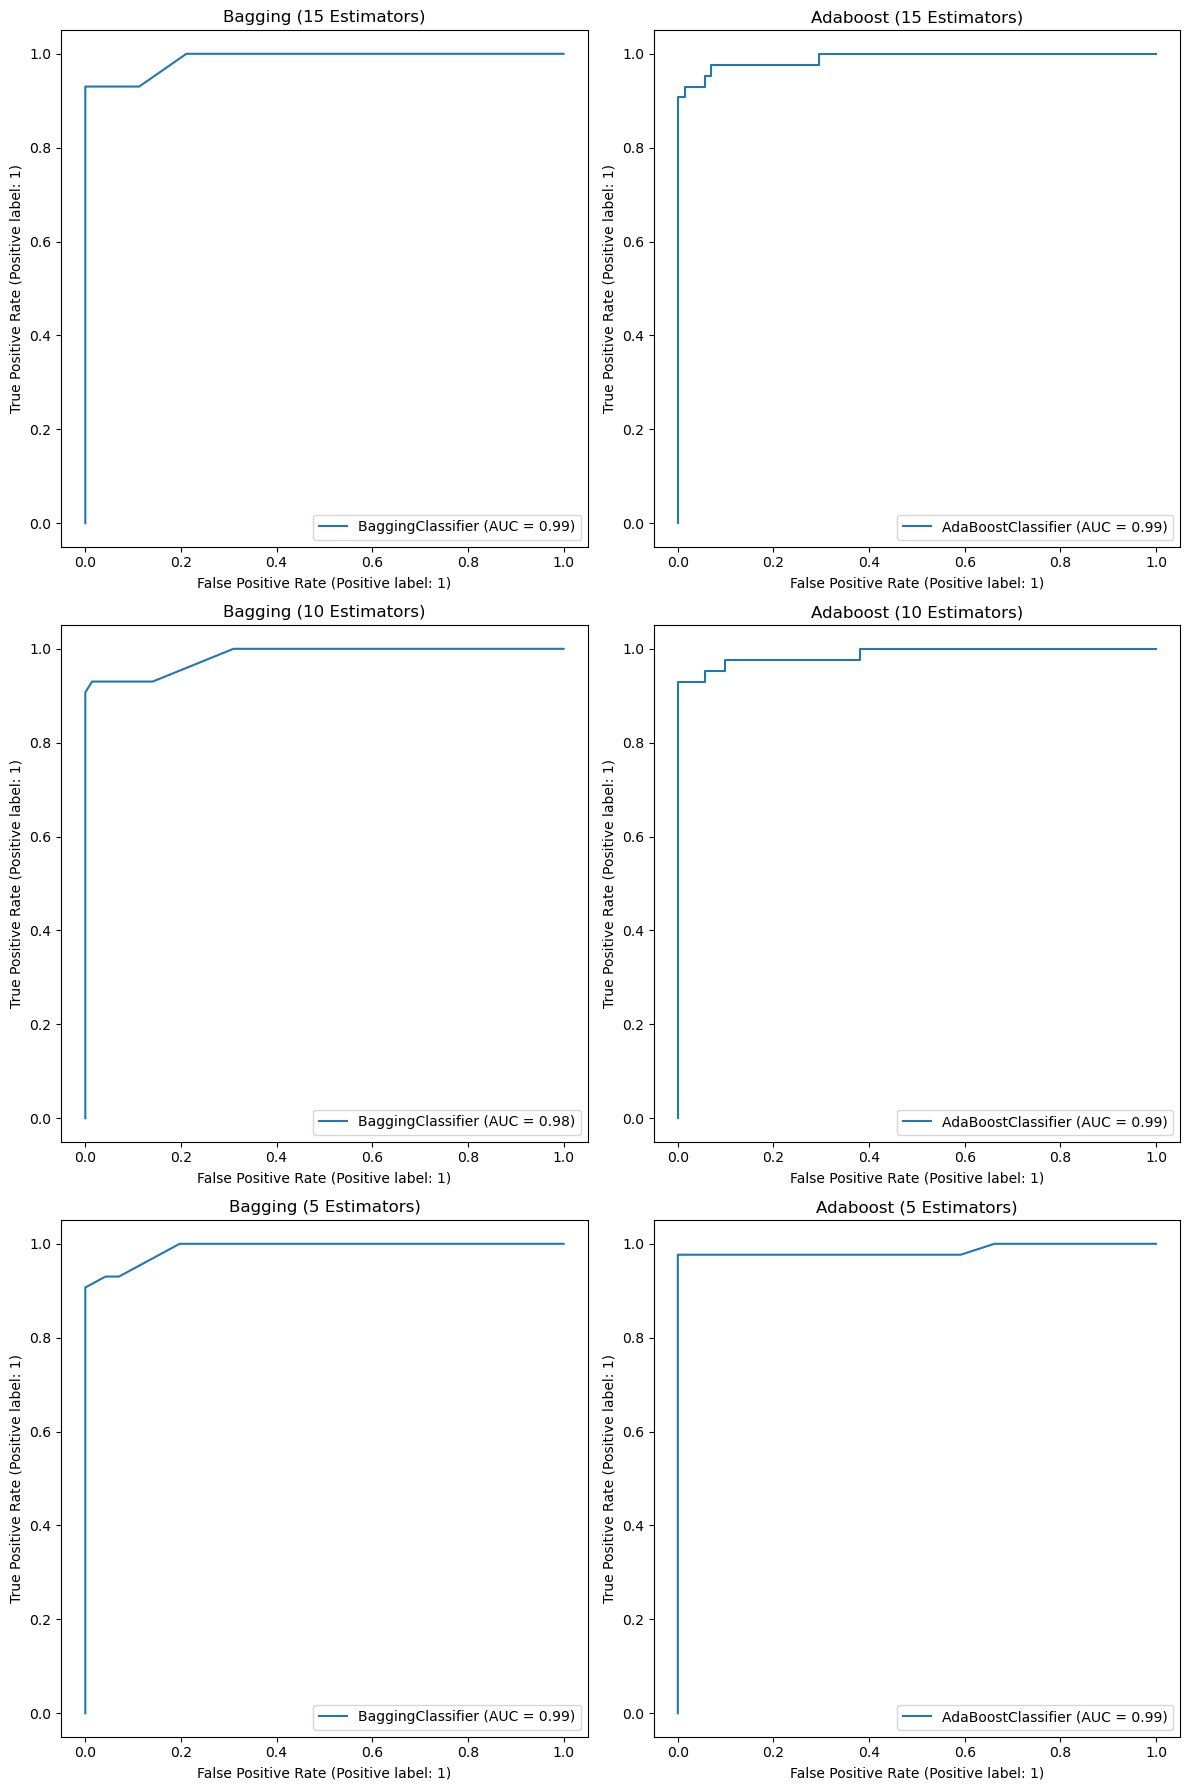

In [79]:
# ploting the result of roc curve 

fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# 15 estimators
plot_roc_curve(bagging_clf_15, X_test, y_test, ax=axes[0, 0])
axes[0, 0].set_title("Bagging (15 Estimators)")
plot_roc_curve(adaboost_clf_15, X_test, y_test, ax=axes[0, 1])
axes[0, 1].set_title("Adaboost (15 Estimators)")

# 10 estimators
plot_roc_curve(bagging_clf_10, X_test, y_test, ax=axes[1, 0])
axes[1, 0].set_title("Bagging (10 Estimators)")
plot_roc_curve(adaboost_clf_10, X_test, y_test, ax=axes[1, 1])
axes[1, 1].set_title("Adaboost (10 Estimators)")

# 5 estimators
plot_roc_curve(bagging_clf_5, X_test, y_test, ax=axes[2, 0])
axes[2, 0].set_title("Bagging (5 Estimators)")
plot_roc_curve(adaboost_clf_5, X_test, y_test, ax=axes[2, 1])
axes[2, 1].set_title("Adaboost (5 Estimators)")

# Adjust layout
plt.tight_layout()
plt.show()

Both methods with their estimators have almost same results just AdaBoost Classifier with 5 estimators covers its Area under the curve (AUC) more than others in the almost 0.99 scores. So it shows this type of model slightly works better than others. 

#### Feature Importance Plot

As in the previouse part the AdaBoost classifier with 5 estimators works better than others in this section, feature importances are calculated for this model and Bagging with 5 estimators as well to compare with each other and see the differences in importance features of breast cancer.

Feature importance indicates how much each feature contributes to the model's predictions. The code then sorts and plots these importances for each estimator.

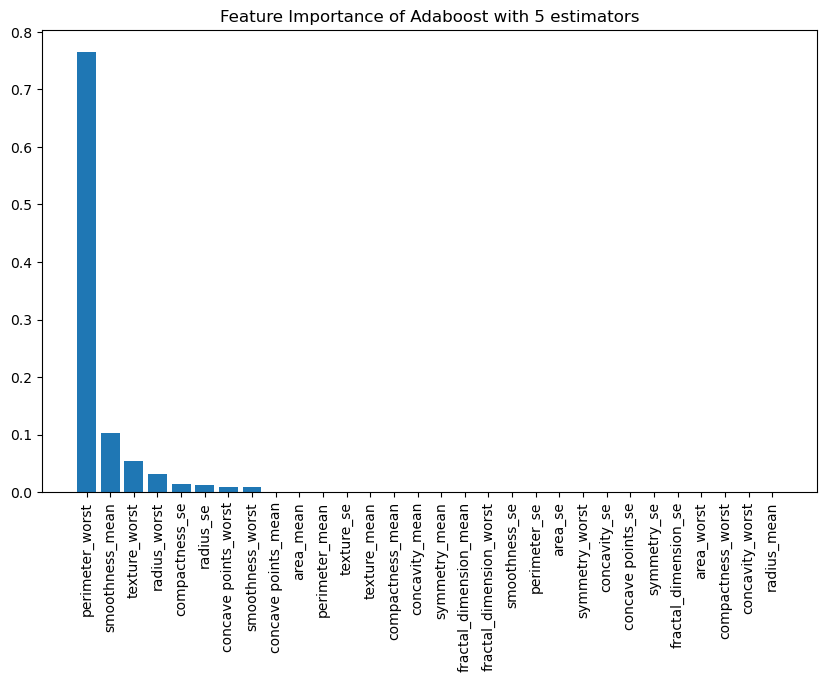

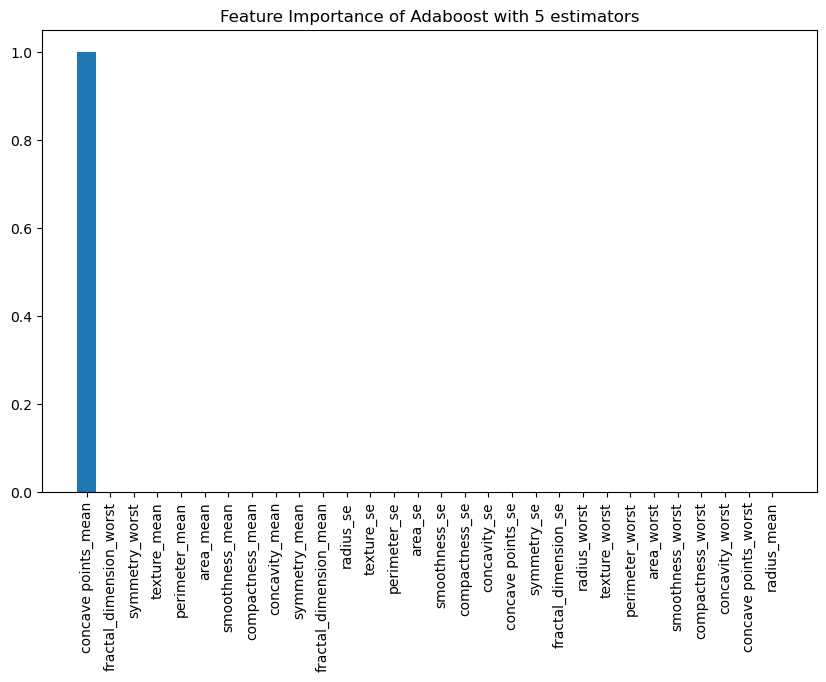

In [80]:
import numpy as np 

# for bagging
importances_5 = bagging_clf_5.estimators_[0].feature_importances_
feature_names = X.columns # Getting feature names
indices_5 = np.argsort(importances_5)[::-1] # Sorting feature importances in descending order

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_5[indices_5])
plt.xticks(range(X.shape[1]), feature_names[indices_5], rotation=90)
plt.title('Feature Importance of Adaboost with 5 estimators')
plt.show()

#for adaboost
importances_5 = adaboost_clf_5.estimators_[0].feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices_5 = np.argsort(importances_5)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_5[indices_5])
plt.xticks(range(X.shape[1]), feature_names[indices_5], rotation=90)
plt.title('Feature Importance of Adaboost with 5 estimators')
plt.show()

As shown in the above the main feature that impact on the model for prediction of breast cancer in Adaboost classifier with 5 estimator is "concave points_mean", meanwhile for bagging with the same estimators there are 8 features that have main role in prediction and the most important is "perimeter_worst" feature.